# Homework 3: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'iviev'     
# collaborated with shruthis, dimac, austinam 

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [41]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
from scipy.stats import norm
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
pokemon_csv = pd.read_csv("data/pokemon.csv")
# pokemon_csv.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [43]:
canada_csv = pd.read_csv("youtube-new/CAvideos.csv")

In [44]:
germany_csv = pd.read_csv("youtube-new/DEvideos.csv")

In [45]:
france_csv = pd.read_csv("youtube-new/FRvideos.csv")

In [46]:
britain_csv = pd.read_csv("youtube-new/GBvideos.csv")

In [47]:
us_csv = pd.read_csv("youtube-new/USvideos.csv")
us_csv['comment_countnorm'] = us_csv['comment_count'] + 1
us_csv['likes_norm'] = us_csv['likes'] + 1
us_csv['dislikes_norm'] = us_csv['dislikes'] + 1



In [48]:
us_csv.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'comment_countnorm',
       'likes_norm', 'dislikes_norm'],
      dtype='object')

In [70]:
us_csv.describe().round(2)

,category_id,views,likes,dislikes,comment_count,comment_countnorm,likes_norm,dislikes_norm
count,40949.00,4.094900e+04,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2.360785e+06,74266.70,3711.40,8446.80,8447.80,74267.70,3712.40
std,7.57,7.394114e+06,228885.34,29029.71,37430.49,37430.49,228885.34,29029.71
min,1.00,5.490000e+02,0.00,0.00,0.00,1.00,1.00,1.00
25%,17.00,2.423290e+05,5424.00,202.00,614.00,615.00,5425.00,203.00
50%,24.00,6.818610e+05,18091.00,631.00,1856.00,1857.00,18092.00,632.00
75%,25.00,1.823157e+06,55417.00,1938.00,5755.00,5756.00,55418.00,1939.00
max,43.00,2.252119e+08,5613827.00,1674420.00,1361580.00,1361581.00,5613828.00,1674421.00


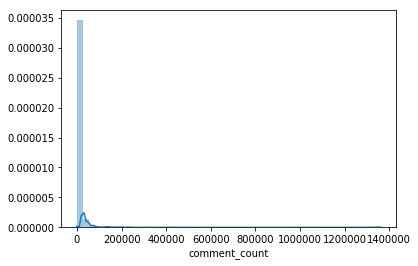

In [50]:
us_comments = us_csv['comment_count']
us_comments
sns.distplot(us_comments)

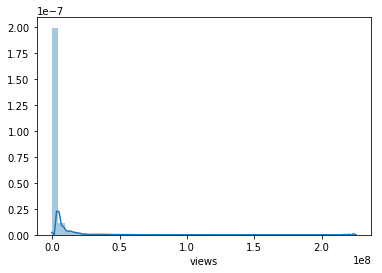

In [51]:
us_views = us_csv['views']
us_views
sns.distplot(us_views)

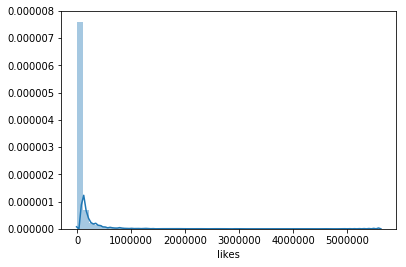

In [52]:
us_likes = us_csv['likes']
us_likes
sns.distplot(us_likes)

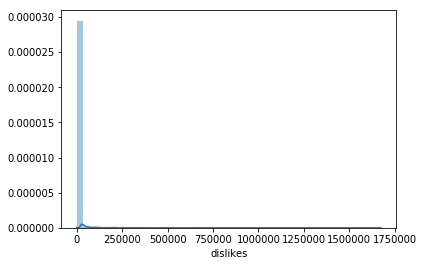

In [33]:
us_dislikes = us_csv['dislikes']
us_dislikes
sns.distplot(us_dislikes)

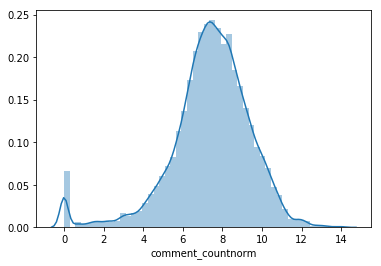

In [37]:
comment_log = np.log(us_csv['comment_countnorm'])
sns.distplot(comment_log)

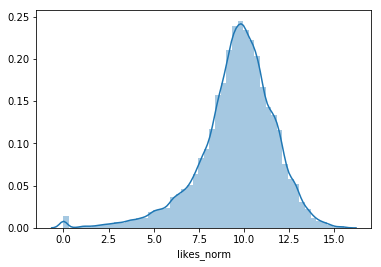

In [38]:
likes_log = np.log(us_csv['likes_norm'])
sns.distplot(likes_log)

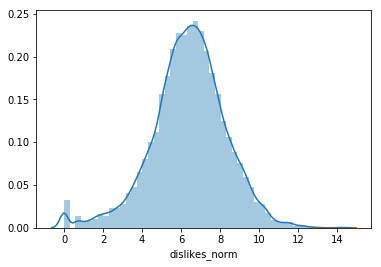

In [39]:
dislikes_log = np.log(us_csv['dislikes_norm'])
sns.distplot(dislikes_log)

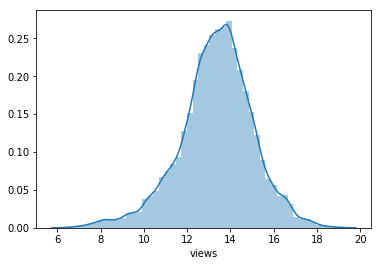

In [40]:
views_log = np.log(us_csv['views'])
sns.distplot(views_log)

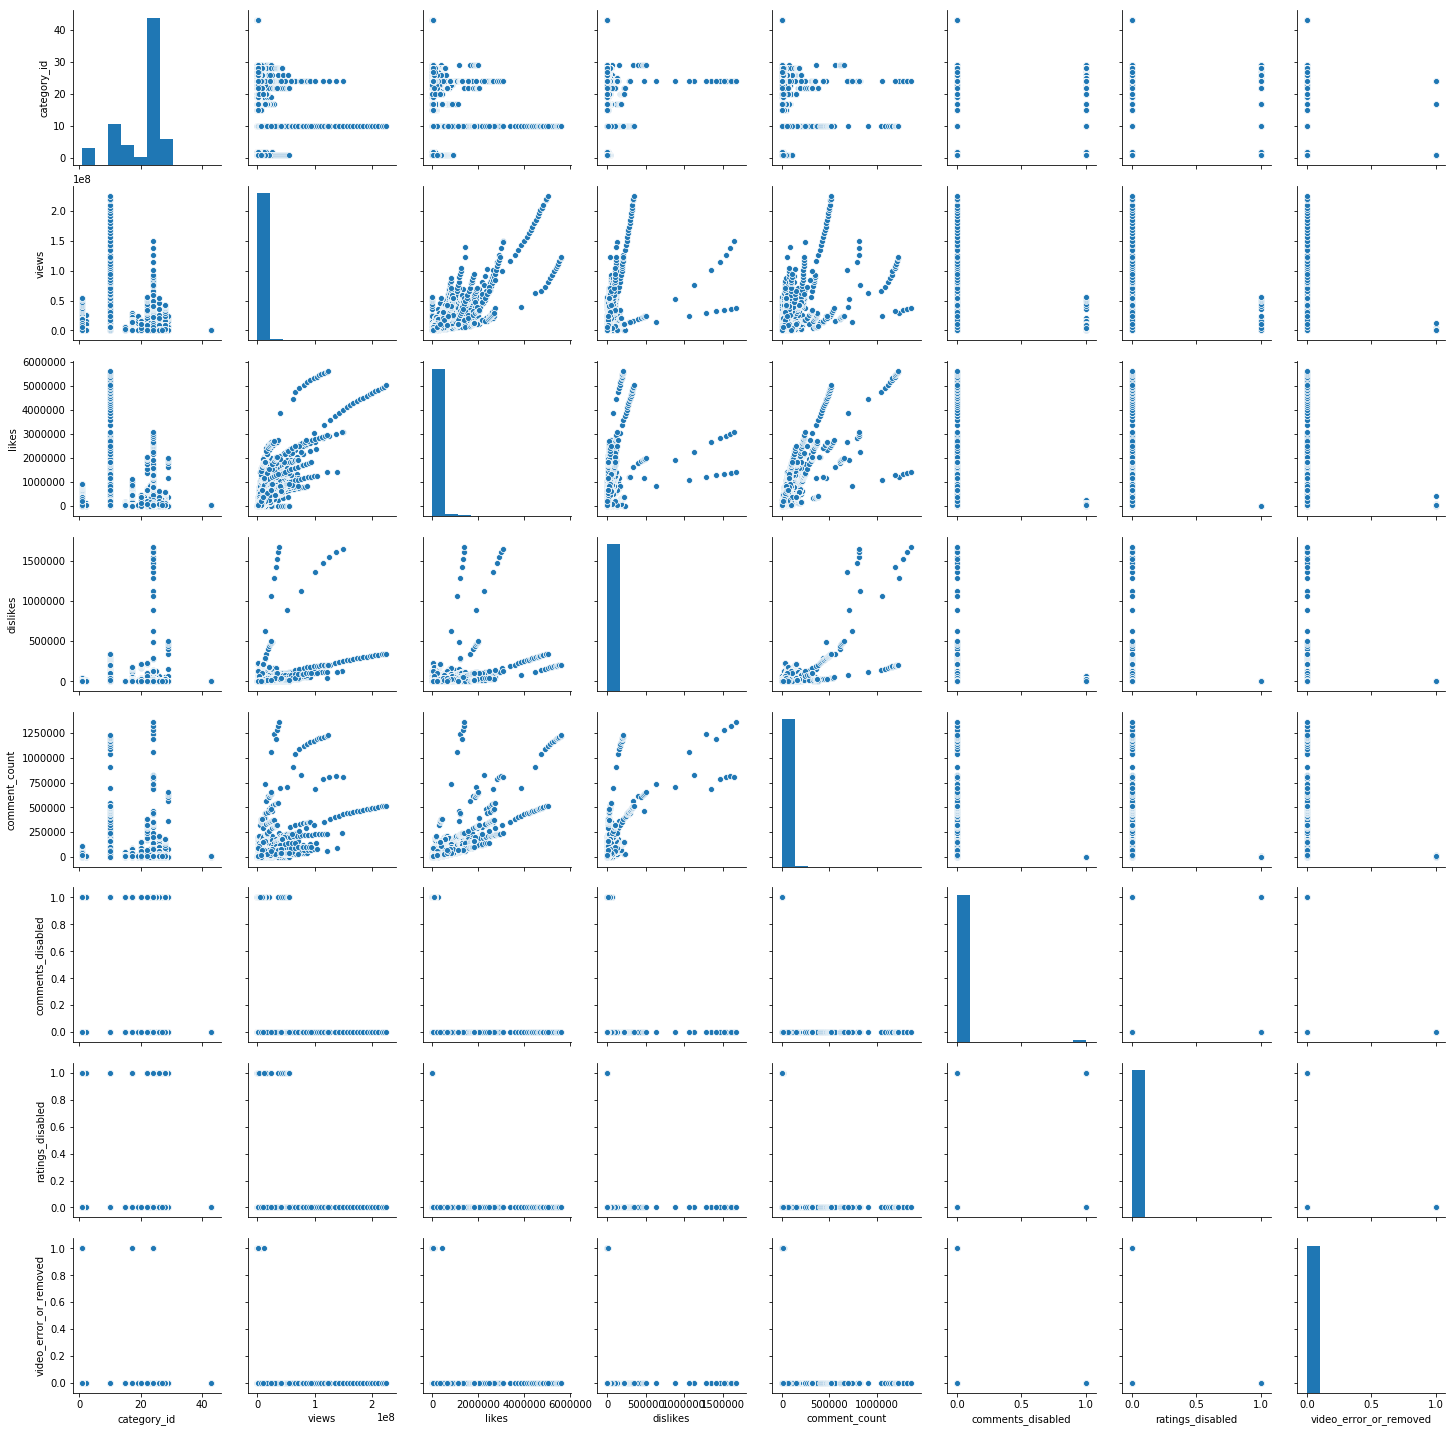

In [14]:
sns.pairplot(us_csv)

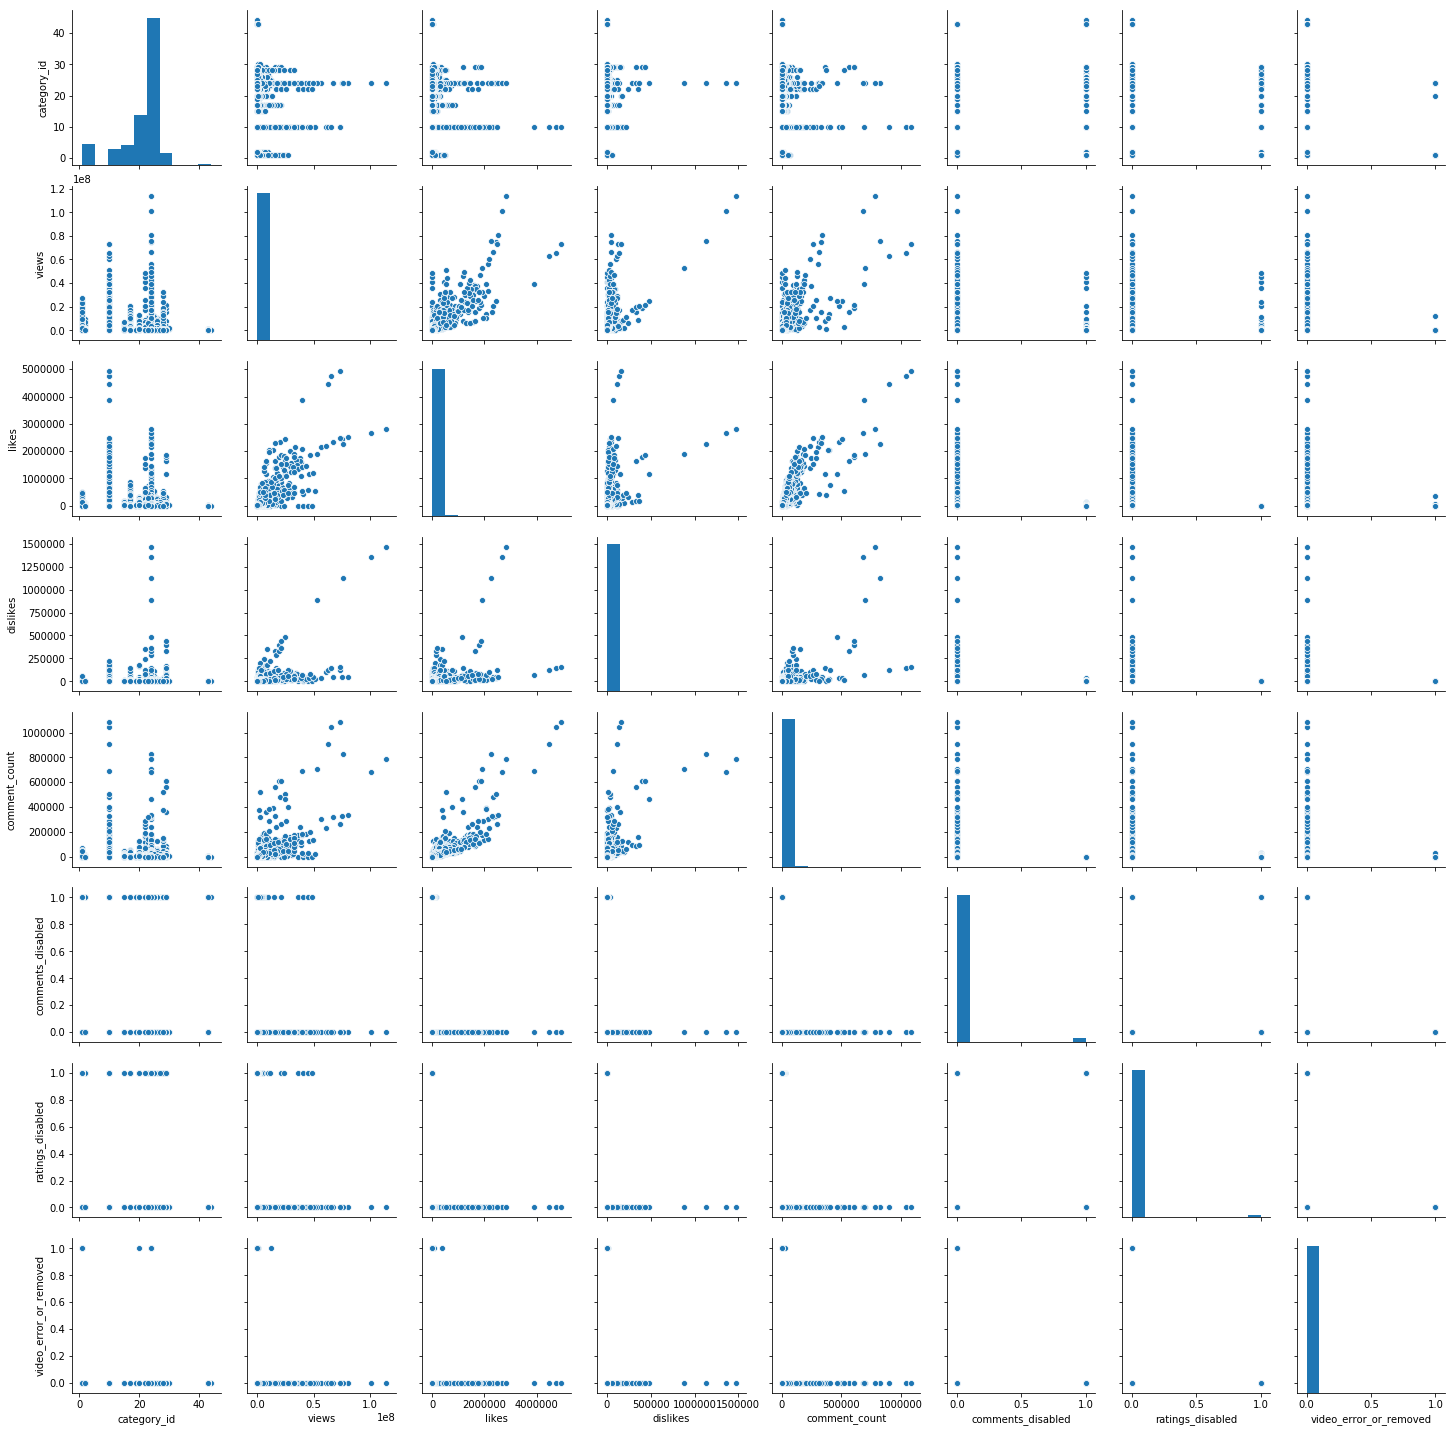

In [15]:
sns.pairplot(germany_csv)

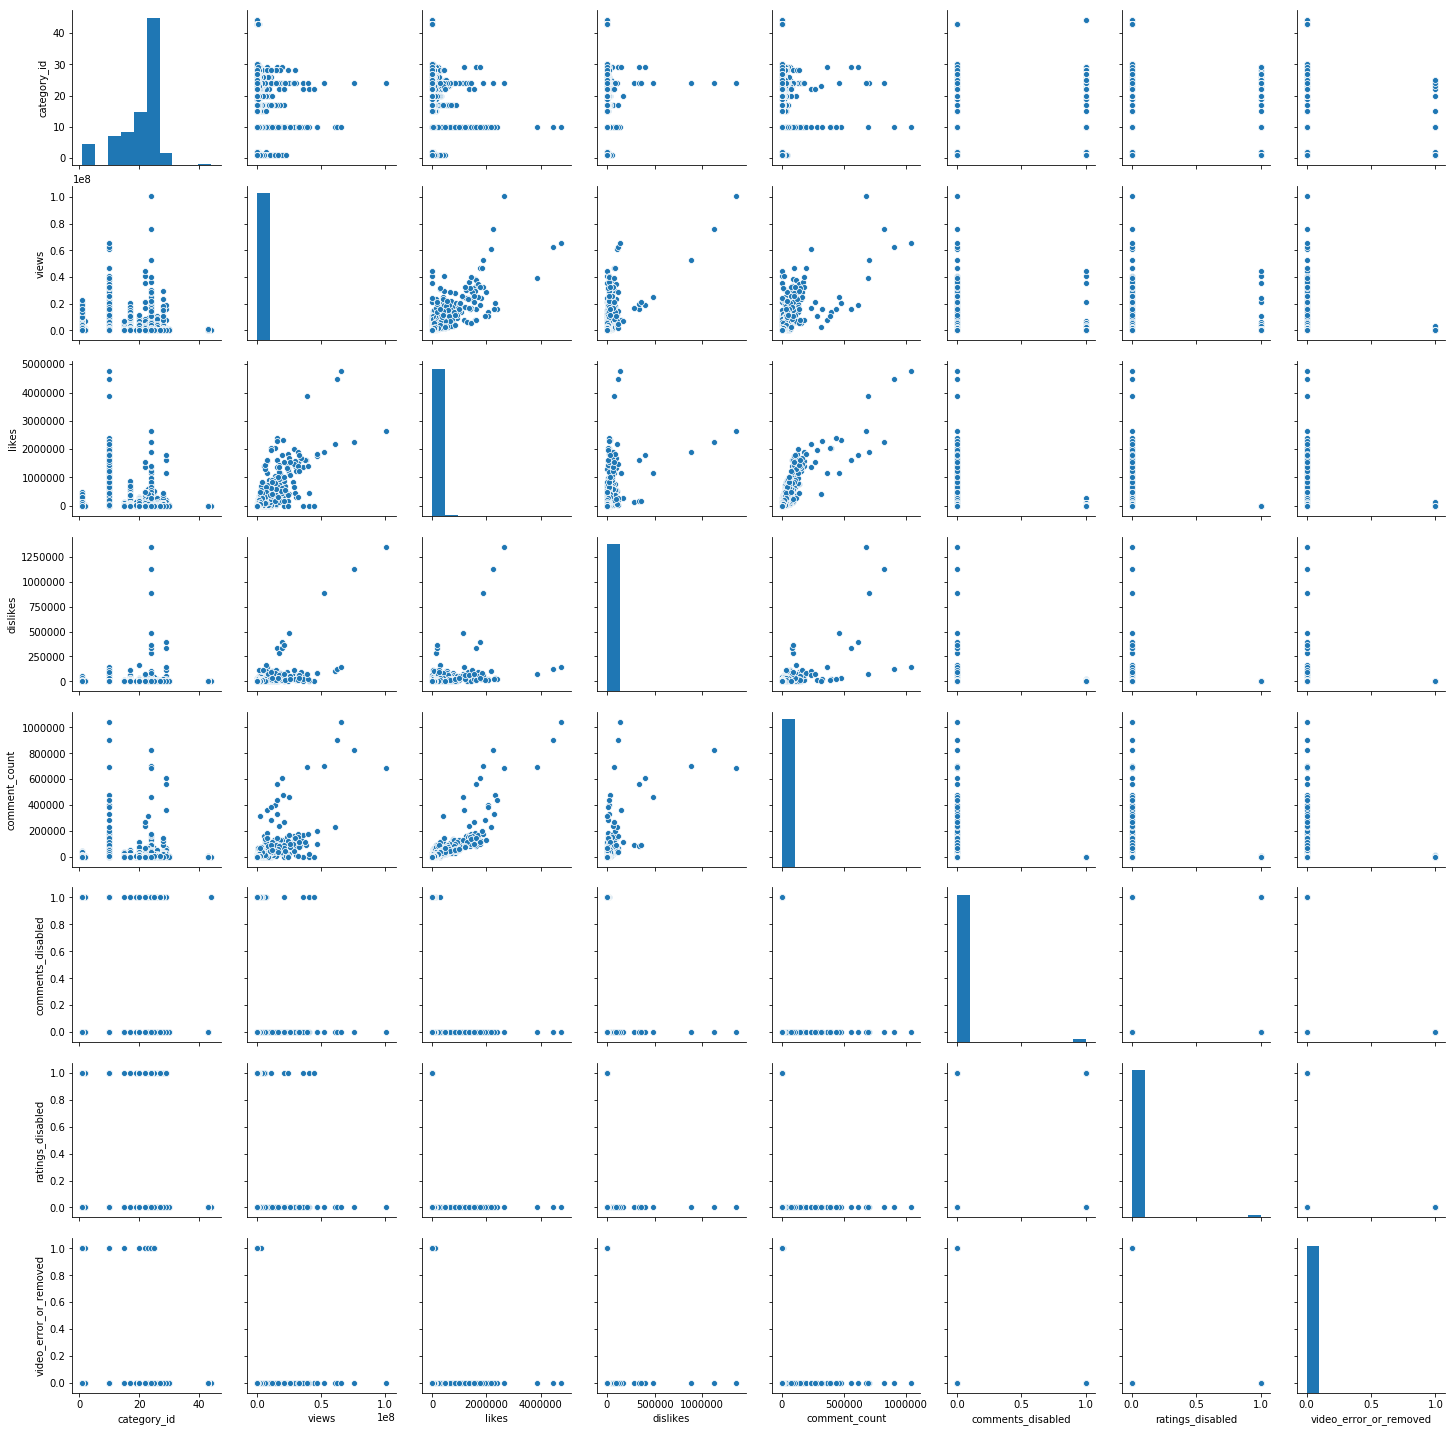

In [16]:
sns.pairplot(france_csv)

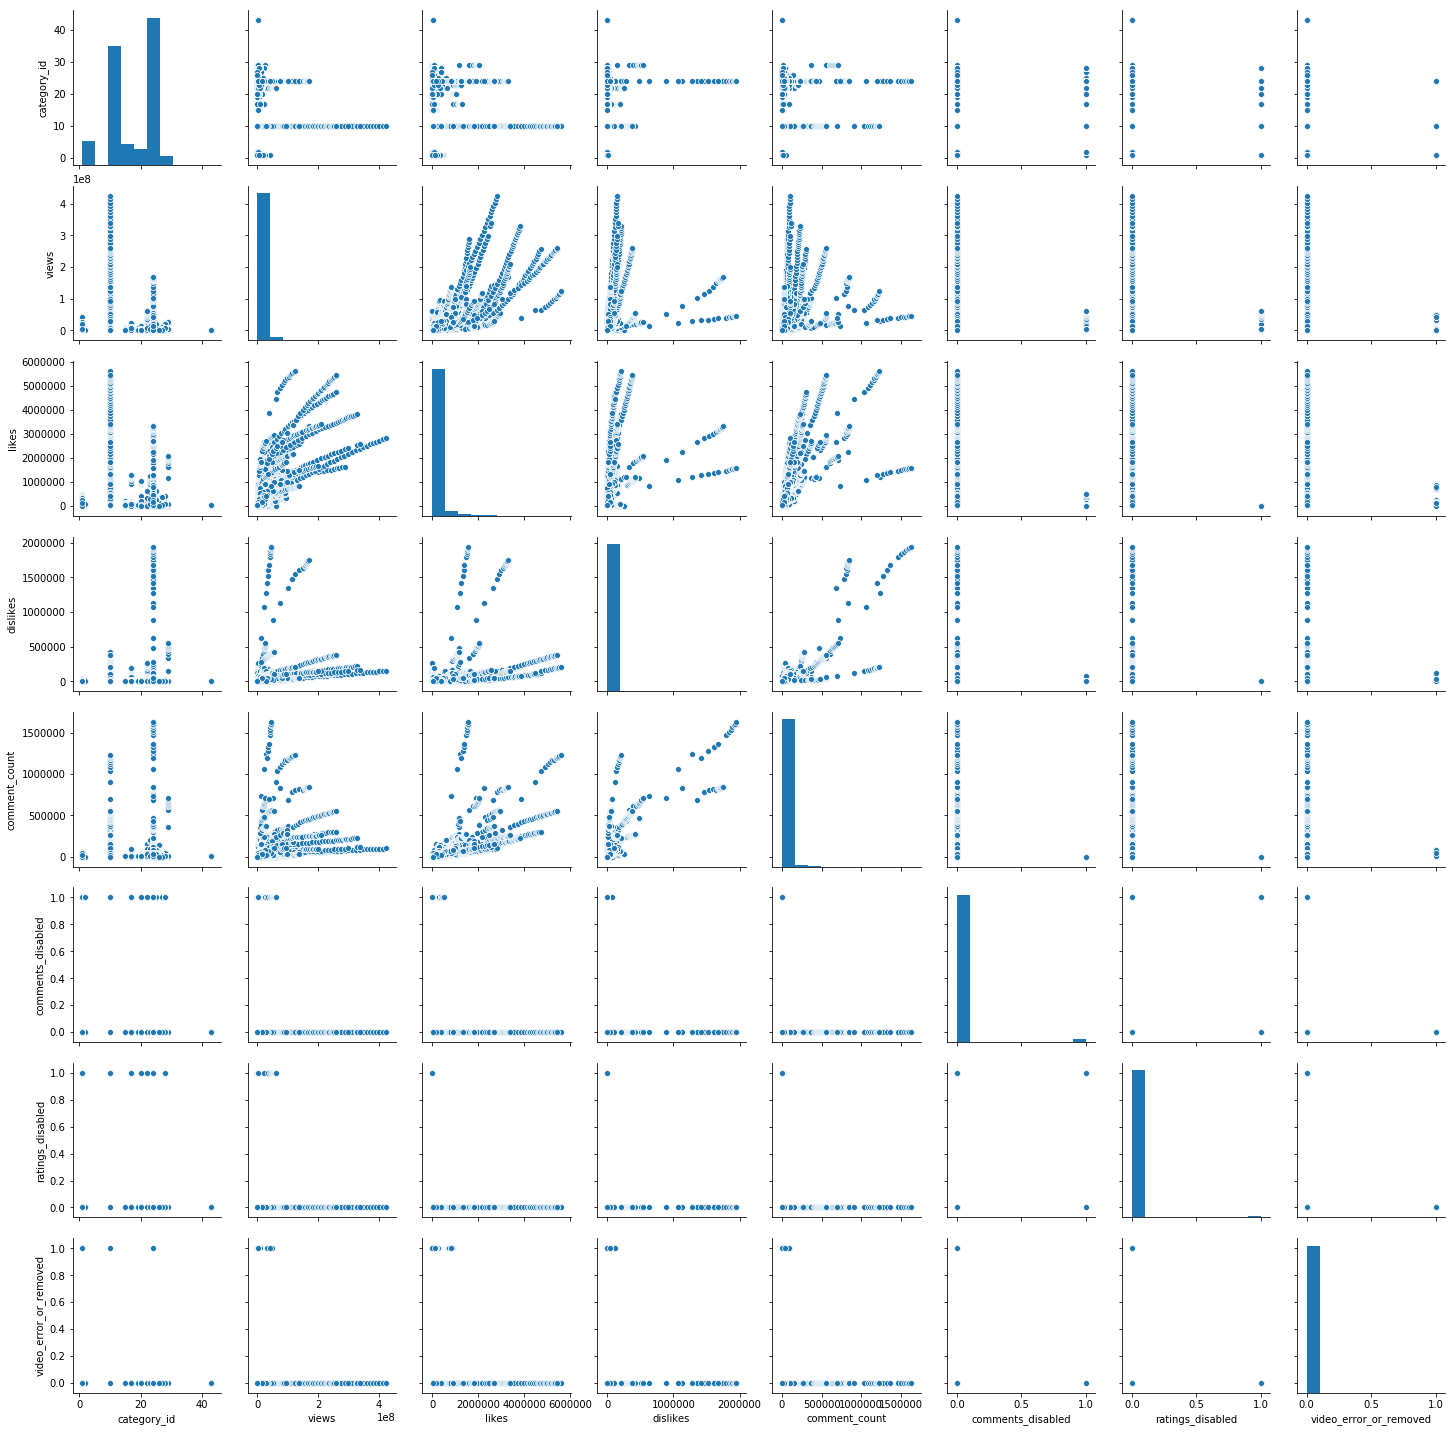

In [17]:
sns.pairplot(britain_csv)

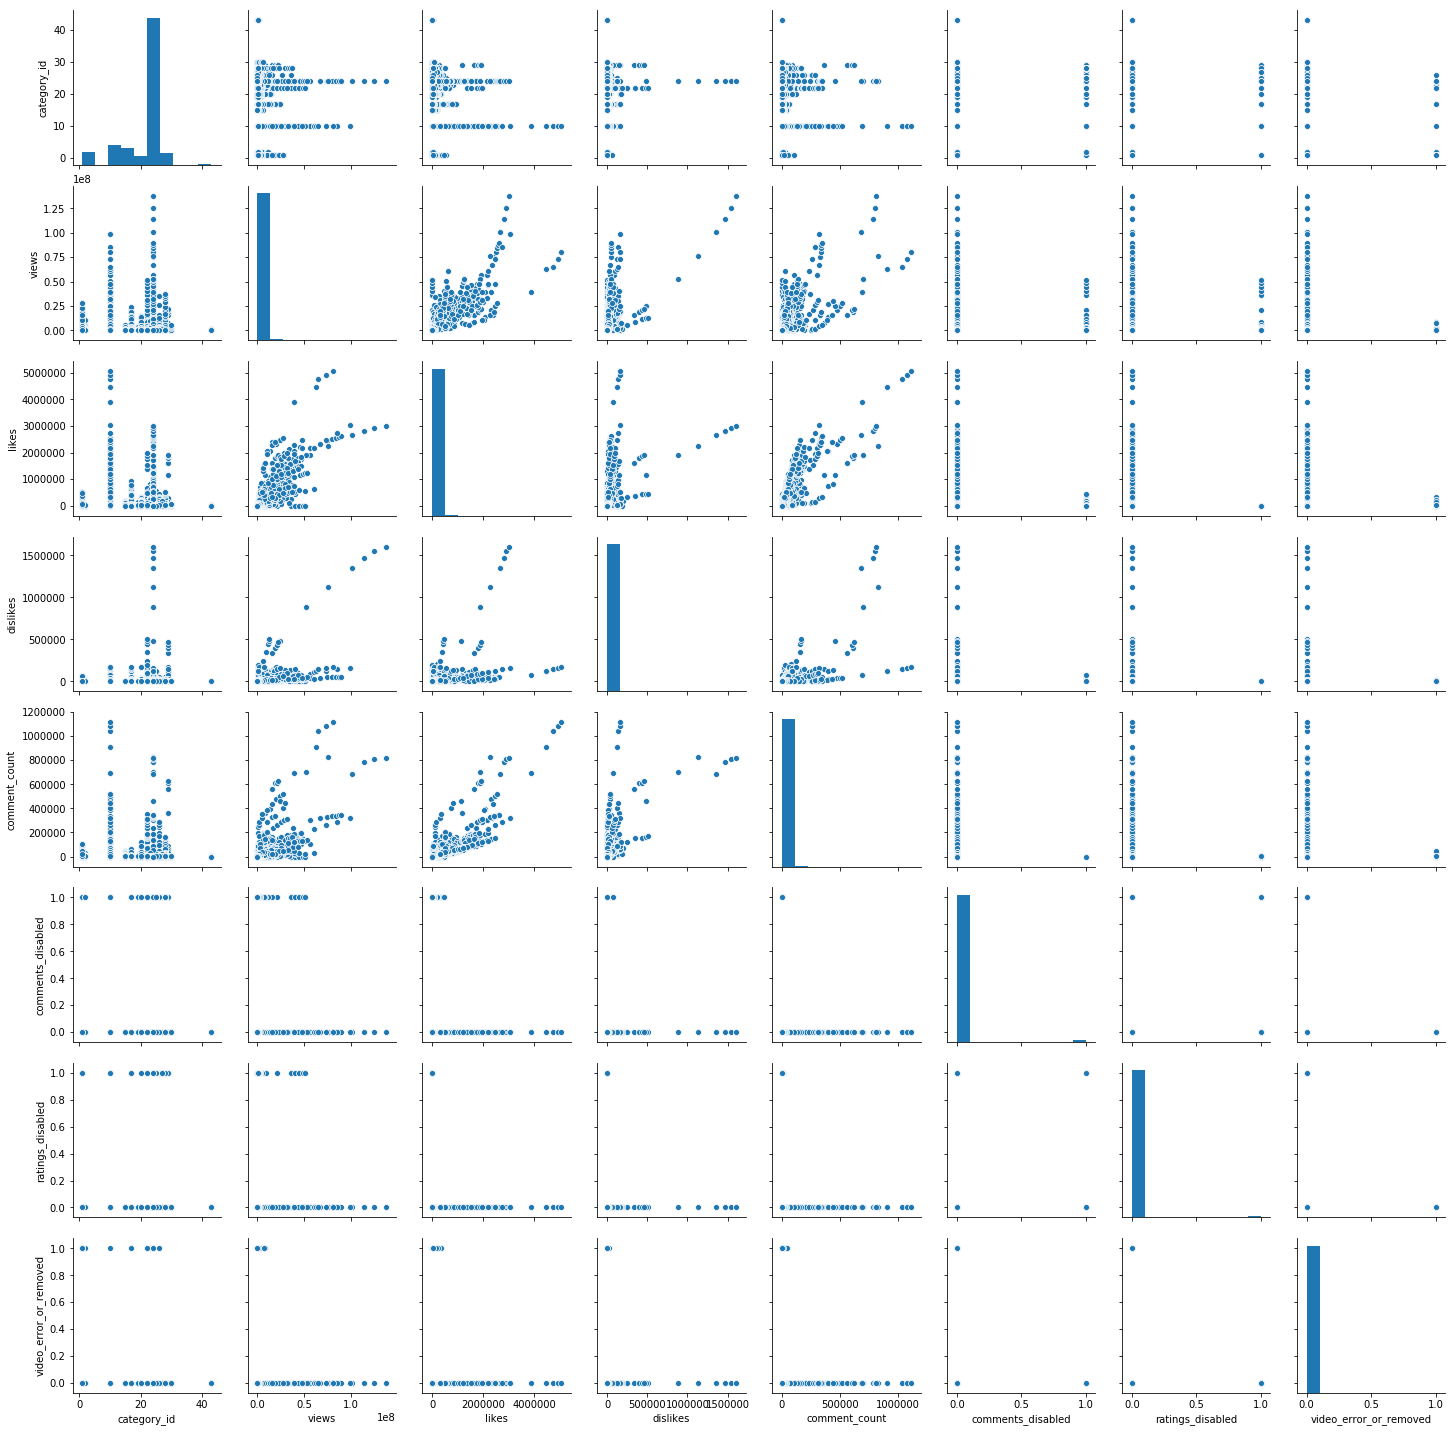

In [18]:
sns.pairplot(canada_csv)

The histograms for these metrics show that the data is highly skewed to the right. The comment_count histogram has a mean of 8446.0 and the viewws data has a large range. 
In order to apply a log transformation, I added 1 to each column and this got rid of the zero values. Applying a log transformation to  the histograms created a normal distribution of the data. 

The pairplots for the US data shows that there is a correlation between views and likes, coment_count and views, likes and comment_count
The pairplots for the other regions are similar to that of the U.S, it shows a corelation between variables, views, likes, commment_count. 

(Use this space to explain your answers)

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

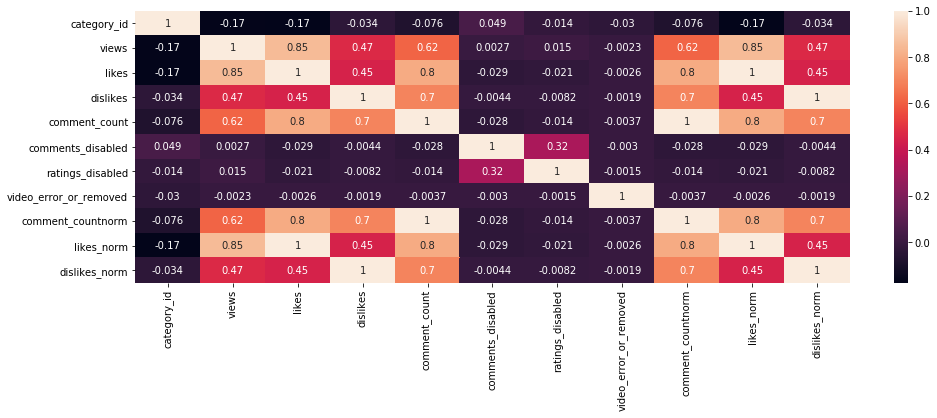

In [55]:
plt.figure(figsize = (16,5))
Var_Corr = us_csv.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

The heatmap for the U.S data shows that there is a strong correlation between number of likes and views (0.75), there is also a strong correlation and between likes and comment count (0.8), there is a moderate correlation between views and comment_count(0.62) 

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [54]:
model_1 = smf.ols('views ~ C(category_id)', data=us_csv).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:40:35   Log-Likelihood:            -7.0455e+05
No. Observations:               40949   AIC:                         1.409e+06
Df Residuals:                   40933   BIC:                         1.409e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.106e+06   1.48e+05     20.950      0.000    2.82e+06     3.4e+06
C(category_id)[T.2]   -1.75e+06   3.95e+05     -4.428      0.000   -2.53e+06   -9.76e+05
C(category_id)[T.10]  3.095e+06   1.73e+05     17.882      0.000    2.76e+06    3.43e+06
C(category_id)[T.15] -2.275e+06   2.79e+05     -8.145      0.000   -2.82e+06   -1.73e+06
C(category_id)[T.17]  -1.08e+06   2.14e+05     -5.053      0.000    -1.5e+06   -6.61e+05
C(category_id)[T.19] -2.252e+06   3.88e+05     -5.809      0.000   -3.01e+06   -1.49e+06
C(category_id)[T.20] -4.854e+05   2.92e+05     -1.664      0.096   -1.06e+06    8.63e+04
C(category_id)[T.22] -1.574e+06   1.95e+05     -8.072      0.000   -1.96e+06   -1.19e+06
C(category_id)[T.23] -1.626e+06   1.92e+05     -8.465      0.000      -2e+06   -1.25e+06
C(category_id)[T.24] -1.038e+06   1.65e+05     -6.301      0.000   -1.36e+06   -7.15e+05
C(category_id)[T.25] -2.514e+06   2.07e+05    -12.162      0.000   -2.92e+06   -2.11e+06
C(category_id)[T.26] -2.123e+06   1.86e+05    -11.441      0.000   -2.49e+06   -1.76e+06
C(category_id)[T.27] -2.393e+06    2.3e+05    -10.385      0.000   -2.85e+06   -1.94e+06
C(category_id)[T.28] -1.654e+06   2.08e+05     -7.932      0.000   -2.06e+06   -1.25e+06
C(category_id)[T.29] -1.424e+05   9.63e+05     -0.148      0.882   -2.03e+06    1.74e+06
C(category_id)[T.43] -2.203e+06   9.63e+05     -2.289      0.022   -4.09e+06   -3.16e+05
==============================================================================
Omnibus:                    71127.349   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         97974448.730
Skew:                          12.209   Prob(JB):                         0.00
Kurtosis:                     241.382   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_2 = smf.ols('likes ~ views', data=us_csv).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:28:01   Log-Likelihood:            -5.3731e+05
No. Observations:               40949   AIC:                         1.075e+06
Df Residuals:                   40947   BIC:                         1.075e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e+04    627.053     19.473      0.000     1.1e+04    1.34e+04
views          0.0263   8.08e-05    325.376      0.000       0.026       0.026
==============================================================================
Omnibus:                    56358.973   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44741630.414
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                     164.224   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_3 = smf.ols('likes ~ comment_count', data=us_csv).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 7.436e+04
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:28:01   Log-Likelihood:            -5.4226e+05
No. Observations:               40949   AIC:                         1.085e+06
Df Residuals:                   40947   BIC:                         1.085e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.279e+04    690.976     47.451      0.000    3.14e+04    3.41e+04
comment_count     4.9106      0.018    272.698      0.000       4.875       4.946
==============================================================================
Omnibus:                    36131.022   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        157045231.024
Skew:                          -2.759   Prob(JB):                         0.00
Kurtosis:                     306.336   Cond. No.                     3.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

a. I chose category_id as the independent variable and views as my dpendednt variabble. The R squared is 0.057 and the fstatistic value is less than 0.001, this shows that there is a a significant relationship between those two variables but there isn't a strong positive correlation between the two of them. The R squared values also indicates that 5.7% of the variance in the distribution of the likes can be explained by the category_id.  


I created a regression model with my independent variable as "views" and my dependednt variable as "likes". The R squared is 0.0721 and the pvalue is less than 0.001, this shows that there is a significant relationship between those two variables and also a strong positive correlation between the two of them. The R squared values also indicates that 7.2% of the variance in the distribution of the likes can be explained by the views.  

My second regression model with my independent variable as "comment_count" and my dependednt variable as "likes". The R squared is 0.64 and the pvalue is less than 0.001, this shows that there is a significant relationship between those two variables and also a moderate positive correlation between the two of them. The R squared values also indicates that 64% of the variance in the distribution of the likes can be explained by the comment_count.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

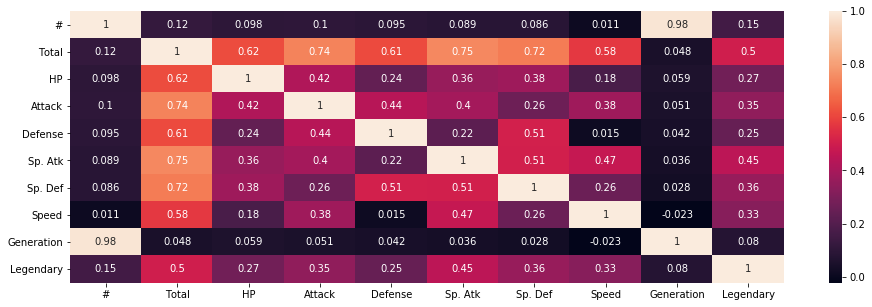

In [56]:
Var_Corr = pokemon_csv.corr()
plt.figure(figsize = (16,5))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Total points has the higher correlation coefficient with the other ability points (Sp Atk,Sp Def) . This is so because the total points is a summation of all the ability points. The lowest correlation is between defense and speed (0.015)

### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

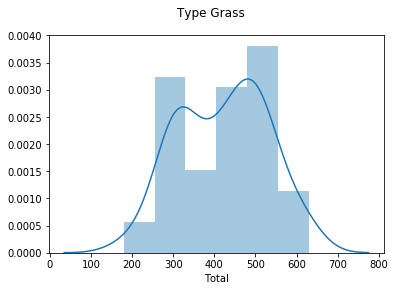

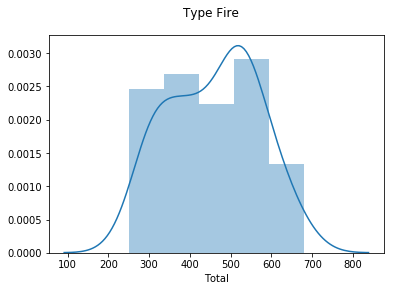

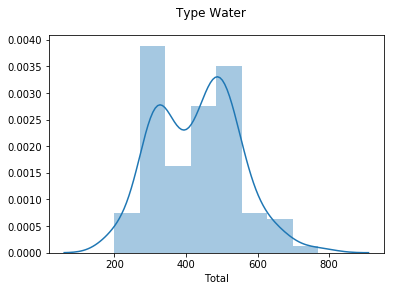

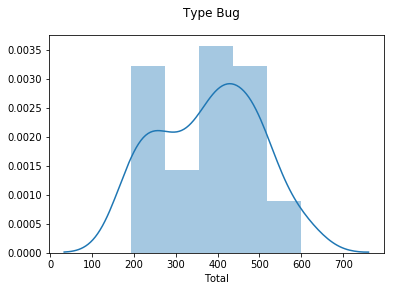

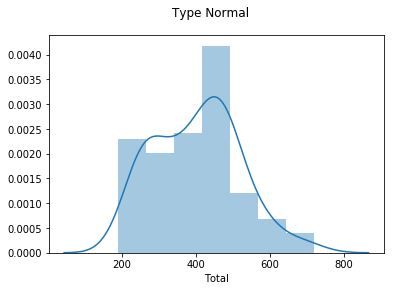

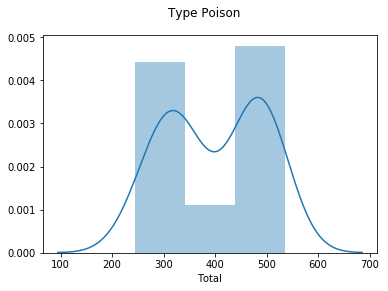

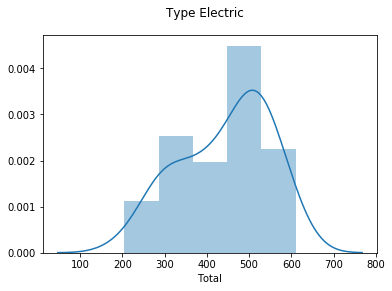

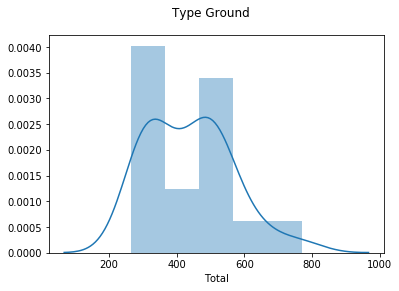

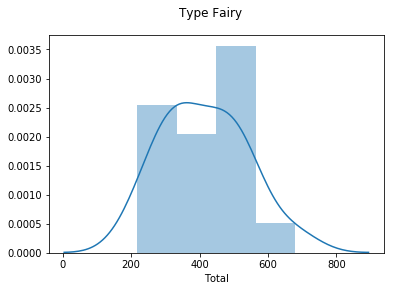

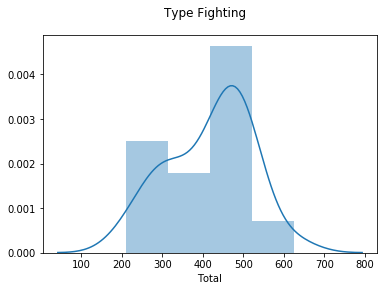

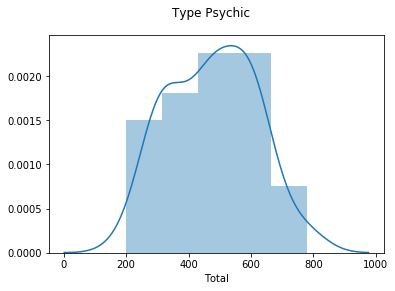

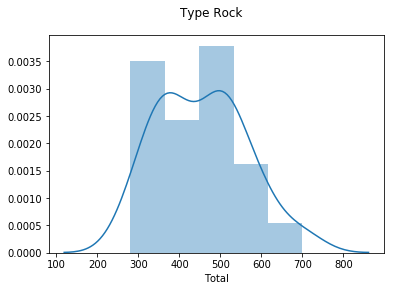

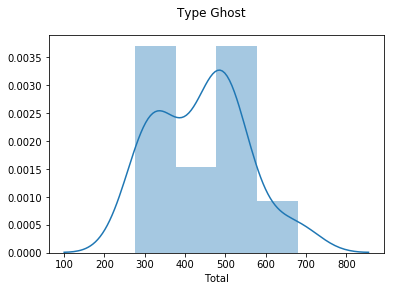

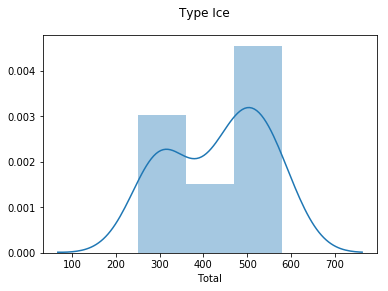

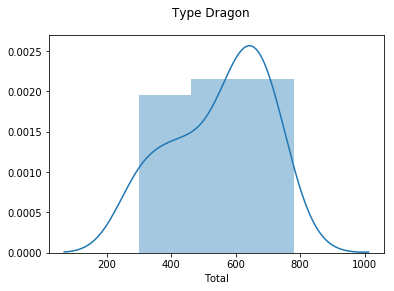

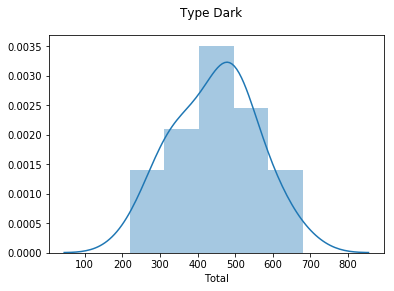

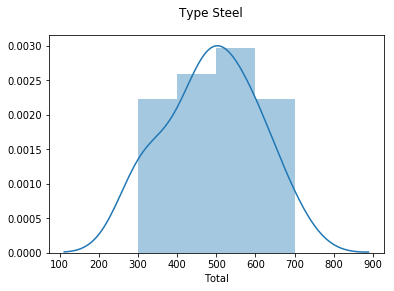

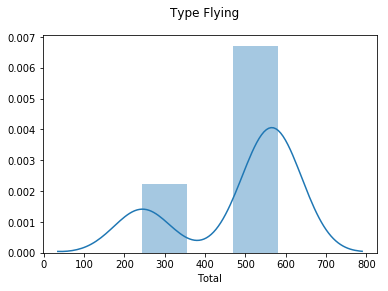

In [68]:
type_list  = []
for item in pokemon_csv['Type 1'].unique():
    type_list.append(item)
    
for each in type_list:
    type_1 = pokemon_csv[pokemon_csv['Type 1'] == each]
    plot_type1 = sns.distplot(type_1.Total)
    plt.suptitle("Type " + str(each))
    plt.show()

The following types have a bimodal distribution:
grass,water,bug, posion,ground,rock, ghost,flying

The following type is bimodal and slighlty skewed to the left:
Rock

The following types have a distribution skewed to the right:
normal
fairy

The following types have a uniform distribution:
fire, dragon


The following types have a distribution that is skewed left:
electric, fighting 
fighting 
psychic

The following types have a normal distribution:
dark
steel

(Use this space to explain your answers)

### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [25]:
pokemon_grp = pokemon_csv.groupby("Generation")
pokemon_grp.describe()
# for generation in pokemon_grp

#                                                              \
            count        mean        std    min     25%    50%     75%    max   
Generation                                                                      
1           166.0   75.819277  45.153246    1.0   36.25   76.5  115.00  151.0   
2           106.0  202.283019  28.769612  152.0  178.25  203.5  226.75  251.0   
3           160.0  321.968750  40.581221  252.0  287.75  321.5  358.25  386.0   
4           121.0  442.446281  31.250053  387.0  415.00  444.0  471.00  493.0   
5           165.0  574.272727  46.516108  494.0  534.00  574.0  615.00  649.0   
6            82.0  688.012195  21.291912  650.0  670.25  688.5  708.75  721.0   

           Attack             ...    Speed         Total              \
            count       mean  ...      75%    max  count        mean   
Generation                    ...                                      
1           166.0  76.638554  ...    92.25  150.0  166.0  426.813253   
2           106.0  72.028302  ...    85.00  130.0  106.0  418.283019   
3           160.0  81.625000  ...    86.25  180.0  160.0  436.225000   
4           121.0  82.867769  ...    91.00  135.0  121.0  459.016529   
5           165.0  82.066667  ...    95.00  145.0  165.0  434.987879   
6            82.0  75.804878  ...    80.00  126.0   82.0  436.378049   

                                                            
                   std    min    25%    50%     75%    max  
Generation                                                  
1           115.878076  195.0  325.0  436.5  500.00  780.0  
2           120.114133  180.0  330.0  422.5  500.00  700.0  
3           136.314193  190.0  310.0  435.0  530.00  780.0  
4           119.556541  194.0  350.0  485.0  530.00  720.0  
5           108.117934  255.0  328.0  465.0  505.00  700.0  
6           114.952340  200.0  335.0  464.0  512.25  700.0  

[6 rows x 64 columns]

count    166.000000
mean     426.813253
std      115.878076
min      195.000000
25%      325.000000
50%      436.500000
75%      500.000000
max      780.000000
Name: Total, dtype: float64


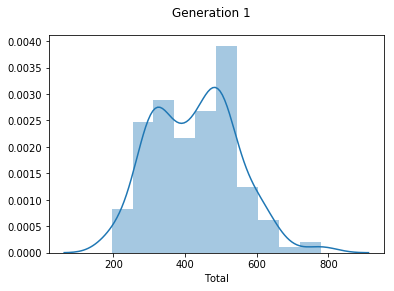

count    106.000000
mean     418.283019
std      120.114133
min      180.000000
25%      330.000000
50%      422.500000
75%      500.000000
max      700.000000
Name: Total, dtype: float64


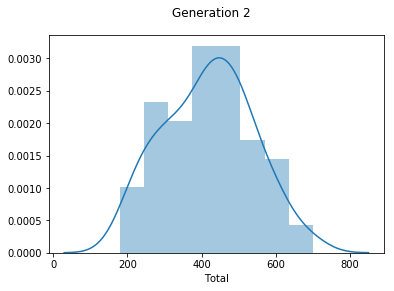

count    160.000000
mean     436.225000
std      136.314193
min      190.000000
25%      310.000000
50%      435.000000
75%      530.000000
max      780.000000
Name: Total, dtype: float64


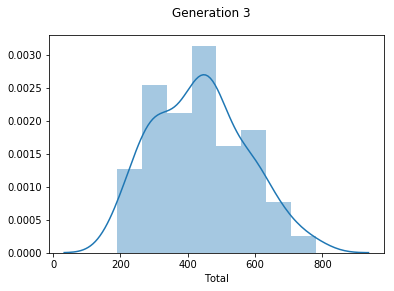

count    121.000000
mean     459.016529
std      119.556541
min      194.000000
25%      350.000000
50%      485.000000
75%      530.000000
max      720.000000
Name: Total, dtype: float64


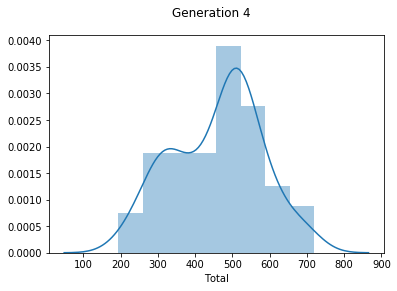

count    165.000000
mean     434.987879
std      108.117934
min      255.000000
25%      328.000000
50%      465.000000
75%      505.000000
max      700.000000
Name: Total, dtype: float64


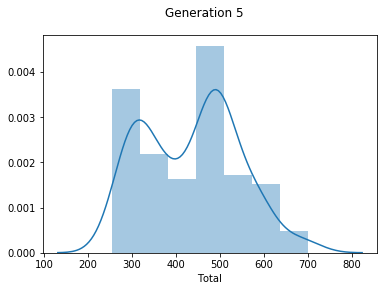

count     82.000000
mean     436.378049
std      114.952340
min      200.000000
25%      335.000000
50%      464.000000
75%      512.250000
max      700.000000
Name: Total, dtype: float64


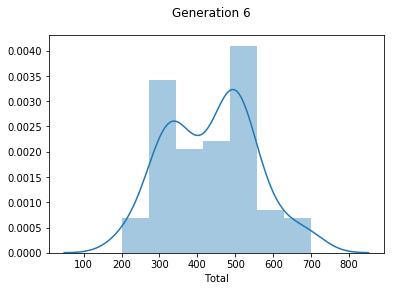

In [71]:
generation_list  = []
for generation in pokemon_csv['Generation'].unique():
    generation_list.append(generation)
    
for each in generation_list:
    generation_type = pokemon_csv[pokemon_csv['Generation'] == each]
    plot_generation = sns.distplot(generation_type.Total)
    print(generation_type['Total'].describe())
    plt.suptitle("Generation " + str(each))
    plt.show()

Generation 1 has a mean of 75.8 and a median of 76.5, it is bimodal and skewed left 
Generation 2 has a mean of 418 and a medaian of 422 and it is normally distributed 
Generation 3 has a roughly normal distribution with a mean of 436 and median of 435.  
Generation 4 is skewed left, it has a mean of 459 and a mode of 485. 
Generation 5 has a mean of 434.9 and a median of 465, it has a bimodal distribution and is skewed right
Generation 6 has a mean of 436.3 and a median 464, it also has a bimodal distribution 

They didn't take into account the distribution of the ability points, the distributions of each genereation are different as shown above, but the ranges are similar

### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [58]:
model_pokemon = smf.ols("Total ~ Q('Type 1')", data=pokemon_csv).fit()
model_pokemon.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.639
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           2.08e-09
Time:                        10:44:58   Log-Likelihood:                -4926.0
No. Observations:                 800   AIC:                             9888.
Df Residuals:                     782   BIC:                             9972.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 378.9275     13.913     27.235      0.000     351.616     406.239
Q('Type 1')[T.Dark]        66.8144     24.989      2.674      0.008      17.761     115.868
Q('Type 1')[T.Dragon]     171.6037     24.718      6.942      0.000     123.082     220.125
Q('Type 1')[T.Electric]    64.4816     22.297      2.892      0.004      20.713     108.250
Q('Type 1')[T.Fairy]       34.2489     31.294      1.094      0.274     -27.180      95.678
Q('Type 1')[T.Fighting]    37.5169     26.235      1.430      0.153     -13.983      89.017
Q('Type 1')[T.Fire]        79.1494     21.224      3.729      0.000      37.487     120.812
Q('Type 1')[T.Flying]     106.0725     59.438      1.785      0.075     -10.604     222.749
Q('Type 1')[T.Ghost]       60.6350     24.718      2.453      0.014      12.113     109.157
Q('Type 1')[T.Grass]       42.2153     19.606      2.153      0.032       3.729      80.702
Q('Type 1')[T.Ground]      58.5725     24.718      2.370      0.018      10.051     107.094
Q('Type 1')[T.Ice]         54.5308     27.388      1.991      0.047       0.767     108.294
Q('Type 1')[T.Normal]      22.7561     18.162      1.253      0.211     -12.897      58.409
Q('Type 1')[T.Poison]      20.2153     25.896      0.781      0.435     -30.619      71.050
Q('Type 1')[T.Psychic]     97.0198     20.686      4.690      0.000      56.413     137.627
Q('Type 1')[T.Rock]        74.8225     22.297      3.356      0.001      31.054     118.591
Q('Type 1')[T.Steel]      108.7762     26.235      4.146      0.000      57.276     160.276
Q('Type 1')[T.Water]       51.5278     17.687      2.913      0.004      16.808      86.248
==============================================================================
Omnibus:                       26.468   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.701
Skew:                           0.032   Prob(JB):                      0.00175
Kurtosis:                       2.386   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The significance was determined if pvalue was less than 0.05, types that are  significant are dark, dragon, electric, fire ghost, grass, ground, ice, psychic, rock, steel and water

The types that are not significant are:
fairy fighting, flying, normal and posion 
